# training set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')

In [3]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [4]:
#df.drop(['E_2','E_3'], axis=1, inplace=True)
#df.drop(['measure'], axis=1, inplace=True)
#df = df.iloc[3:,:]

In [5]:
data['Energy_kWh_1'] = data['Energy_kWh'].shift(-1)
data['Energy_kWh_2'] = data['Energy_kWh'].shift(-2)
data['Energy_kWh_3'] = data['Energy_kWh'].shift(-3)
data['Energy_kWh_4'] = data['Energy_kWh'].shift(-4)
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN,0.560625,0.000000,0.000000,0.000558
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN,0.000000,0.000000,0.000558,0.000000
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN,0.000000,0.000558,0.000000,0.000000
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567,0.000558,0.000000,0.000000,0.000000
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925,0.000000,0.000000,0.000000,0.000000
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [6]:
data = data.iloc[3:-4]
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567,0.000558,0.0,0.0,0.0
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625,0.000000,0.0,0.0,0.0
5,2020-12-02 14:00:00,0.000000,2,14,NaN,False,3.0,0.000558,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,2020-12-02 15:00:00,0.000000,2,15,NaN,False,3.0,0.000000,0.000558,0.000000,0.000000,0.0,0.0,0.0
7,2020-12-02 16:00:00,0.000000,2,16,NaN,False,3.0,0.000000,0.000000,0.000558,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,2022-02-28 16:00:00,0.007133,0,16,Spring holiday,True,0.0,0.047292,0.000000,0.000000,0.000925,0.0,0.0,0.0
10880,2022-02-28 17:00:00,0.000925,0,17,Spring holiday,True,0.0,0.007133,0.047292,0.000000,0.000000,0.0,0.0,0.0
10881,2022-02-28 18:00:00,0.000000,0,18,Spring holiday,True,0.0,0.000925,0.007133,0.047292,0.000000,0.0,0.0,0.0
10882,2022-02-28 19:00:00,0.000000,0,19,Spring holiday,True,0.0,0.000000,0.000925,0.007133,0.000000,0.0,0.0,0.0


In [7]:
data.reset_index(inplace=True)

In [8]:
df = data.drop(['index', 'Time', 'hols'], axis=1)
# Change the measure column to turn it into categorical data
df.loc[:, 'measure'] = df['measure'].astype(int)
df

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,0.000000,2,12,False,3,0.000000,0.560625,4.214567,0.000558,0.0,0.0,0.0
1,0.000558,2,13,False,3,0.000000,0.000000,0.560625,0.000000,0.0,0.0,0.0
2,0.000000,2,14,False,3,0.000558,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,2,15,False,3,0.000000,0.000558,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,2,16,False,3,0.000000,0.000000,0.000558,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10876,0.007133,0,16,True,0,0.047292,0.000000,0.000000,0.000925,0.0,0.0,0.0
10877,0.000925,0,17,True,0,0.007133,0.047292,0.000000,0.000000,0.0,0.0,0.0
10878,0.000000,0,18,True,0,0.000925,0.007133,0.047292,0.000000,0.0,0.0,0.0
10879,0.000000,0,19,True,0,0.000000,0.000925,0.007133,0.000000,0.0,0.0,0.0


In [9]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [10]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [11]:
cont_df

['E_1', 'E_2', 'E_3']

In [12]:
procs_dt = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_dt = TabularPandas(df, procs_dt, cat_df, cont_df, splits=splits, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [27]:
xs,ys = to_dt.train.xs, to_dt.train.ys
valid_xs, valid_ys = to_dt.valid.xs, to_dt.valid.ys

# test set

In [14]:
data_test = pd.read_csv(r'./charge0422_hourly_with_Covid_new.csv')

In [15]:
data_test['Energy_kWh_1'] = data_test['Energy_kWh'].shift(-1)
data_test['Energy_kWh_2'] = data_test['Energy_kWh'].shift(-2)
data_test['Energy_kWh_3'] = data_test['Energy_kWh'].shift(-3)
data_test['Energy_kWh_4'] = data_test['Energy_kWh'].shift(-4)
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True,0,0.000000,0.000000,0.0,0.000000,0.044108,7.013325,7.089000
1,2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0,0.044108,7.013325,7.089000,7.154083
2,2022-03-01 06:00:00,0.044108,1,6,Spring holiday,True,0,0.000000,0.000000,0.0,7.013325,7.089000,7.154083,6.869500
3,2022-03-01 07:00:00,7.013325,1,7,Spring holiday,True,0,0.044108,0.000000,0.0,7.089000,7.154083,6.869500,1.168642
4,2022-03-01 08:00:00,7.089000,1,8,Spring holiday,True,0,7.013325,0.044108,0.0,7.154083,6.869500,1.168642,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,2022-03-28 03:00:00,0.000000,0,3,NaN,False,0,0.000000,0.000000,0.0,0.000000,0.000000,15.496425,28.914517
648,2022-03-28 04:00:00,0.000000,0,4,NaN,False,0,0.000000,0.000000,0.0,0.000000,15.496425,28.914517,NaN
649,2022-03-28 05:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0,15.496425,28.914517,NaN,NaN
650,2022-03-28 06:00:00,15.496425,0,6,NaN,False,0,0.000000,0.000000,0.0,28.914517,NaN,NaN,NaN


In [16]:
data_test = data_test.iloc[3:-4]
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
3,2022-03-01 07:00:00,7.013325,1,7,Spring holiday,True,0,0.044108,0.000000,0.000000,7.089000,7.154083,6.869500,1.168642
4,2022-03-01 08:00:00,7.089000,1,8,Spring holiday,True,0,7.013325,0.044108,0.000000,7.154083,6.869500,1.168642,0.000000
5,2022-03-01 09:00:00,7.154083,1,9,Spring holiday,True,0,7.089000,7.013325,0.044108,6.869500,1.168642,0.000000,0.114525
6,2022-03-01 10:00:00,6.869500,1,10,Spring holiday,True,0,7.154083,7.089000,7.013325,1.168642,0.000000,0.114525,0.000000
7,2022-03-01 11:00:00,1.168642,1,11,Spring holiday,True,0,6.869500,7.154083,7.089000,0.000000,0.114525,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022-03-27 23:00:00,0.000000,6,23,NaN,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
644,2022-03-28 00:00:00,0.000000,0,0,NaN,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
645,2022-03-28 01:00:00,0.000000,0,1,NaN,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
646,2022-03-28 02:00:00,0.000000,0,2,NaN,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.496425


In [17]:
data_test.reset_index(inplace=True)

In [18]:
df_test = data_test.drop(['index', 'Time', 'hols'], axis=1)
df_test

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,7.013325,1,7,True,0,0.044108,0.000000,0.000000,7.089000,7.154083,6.869500,1.168642
1,7.089000,1,8,True,0,7.013325,0.044108,0.000000,7.154083,6.869500,1.168642,0.000000
2,7.154083,1,9,True,0,7.089000,7.013325,0.044108,6.869500,1.168642,0.000000,0.114525
3,6.869500,1,10,True,0,7.154083,7.089000,7.013325,1.168642,0.000000,0.114525,0.000000
4,1.168642,1,11,True,0,6.869500,7.154083,7.089000,0.000000,0.114525,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.000000,6,23,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
641,0.000000,0,0,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
642,0.000000,0,1,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
643,0.000000,0,2,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.496425


In [19]:
# Change the measure column to turn it into categorical data
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)
df_test

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,7.013325,1,7,True,0,0.044108,0.000000,0.000000,7.089000,7.154083,6.869500,1.168642
1,7.089000,1,8,True,0,7.013325,0.044108,0.000000,7.154083,6.869500,1.168642,0.000000
2,7.154083,1,9,True,0,7.089000,7.013325,0.044108,6.869500,1.168642,0.000000,0.114525
3,6.869500,1,10,True,0,7.154083,7.089000,7.013325,1.168642,0.000000,0.114525,0.000000
4,1.168642,1,11,True,0,6.869500,7.154083,7.089000,0.000000,0.114525,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.000000,6,23,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
641,0.000000,0,0,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
642,0.000000,0,1,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
643,0.000000,0,2,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.496425


In [48]:
cont_df_test,cat_df_test = cont_cat_split(df_test, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [60]:
procs_dt = [Categorify, Normalize]
to_test = TabularPandas(df_test, procs_dt, cat_df_test, cont_df_test, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [61]:
test_xs,test_ys = to_test.train.xs, to_test.train.ys

# Random forest

## A decision tree

In [28]:
from sklearn import tree

m = tree.DecisionTreeRegressor(min_samples_leaf=28)
m.fit(xs,ys)

DecisionTreeRegressor(min_samples_leaf=28)

In [41]:
def Predict5h(df_in, df_targ, model):
    predictions = model.predict(df_in)
    targets = df_targ.to_numpy()
    return targets, predictions

In [42]:
import torch.nn.functional as F

# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score

In [64]:
targs, preds = Predict5h(xs,ys,m)

In [65]:
multiPointLoss(torch.tensor(targs), torch.tensor(preds))

tensor(2.2647, dtype=torch.float64)

In [66]:
targs, preds = Predict5h(valid_xs,valid_ys,m)

In [67]:
multiPointLoss(torch.tensor(targs), torch.tensor(preds))

tensor(2.3279, dtype=torch.float64)

In [68]:
targs, preds = Predict5h(test_xs,test_ys,m)

In [69]:
multiPointLoss(torch.tensor(targs), torch.tensor(preds))

tensor(3.9830, dtype=torch.float64)

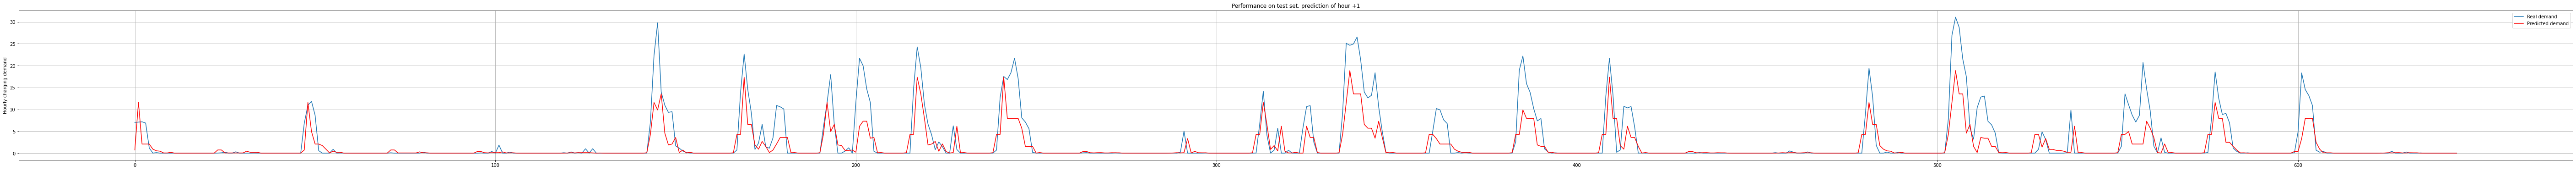

In [71]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Performance on test set, prediction of hour +1')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

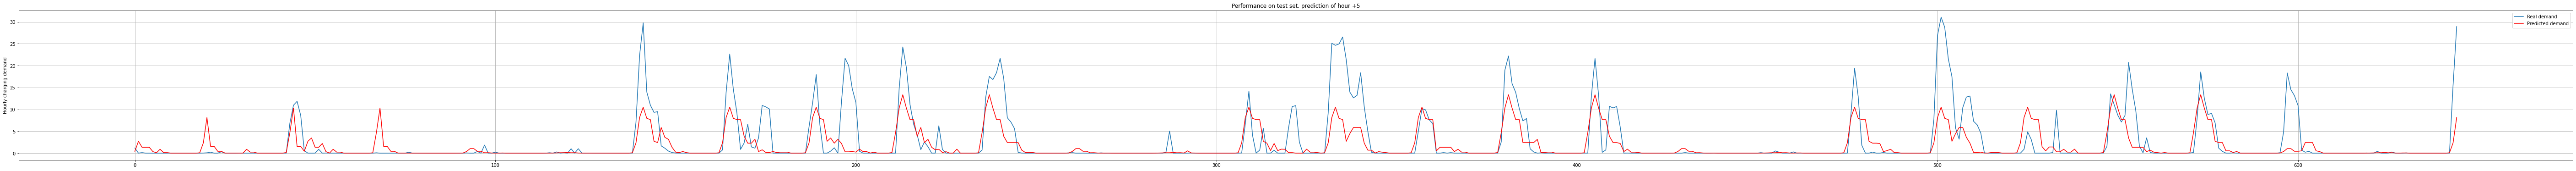

In [72]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,4])
plt.plot(range(len(preds)), preds[:,4], 'r')
plt.title('Performance on test set, prediction of hour +5')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

## A forest

In [73]:
from sklearn import ensemble

def rf(xs, ys, n_estimators=100, max_samples=500, max_features=0.5, min_samples_leaf=5, **kwargs):
    return ensemble.RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples,
                                max_features=max_features, min_samples_leaf=min_samples_leaf,
                                oob_score=True).fit(xs, ys)

In [99]:
forest = rf(xs, ys, min_sample_leaf=10)

In [100]:
targs, preds = Predict5h(xs,ys,forest)

In [101]:
multiPointLoss(torch.tensor(targs), torch.tensor(preds))

tensor(2.4089, dtype=torch.float64)

In [102]:
targs, preds = Predict5h(valid_xs,valid_ys,forest)

In [103]:
multiPointLoss(torch.tensor(targs), torch.tensor(preds))

tensor(2.3931, dtype=torch.float64)

In [104]:
targs, preds = Predict5h(test_xs,test_ys,forest)

In [105]:
multiPointLoss(torch.tensor(targs), torch.tensor(preds))

tensor(4.2618, dtype=torch.float64)

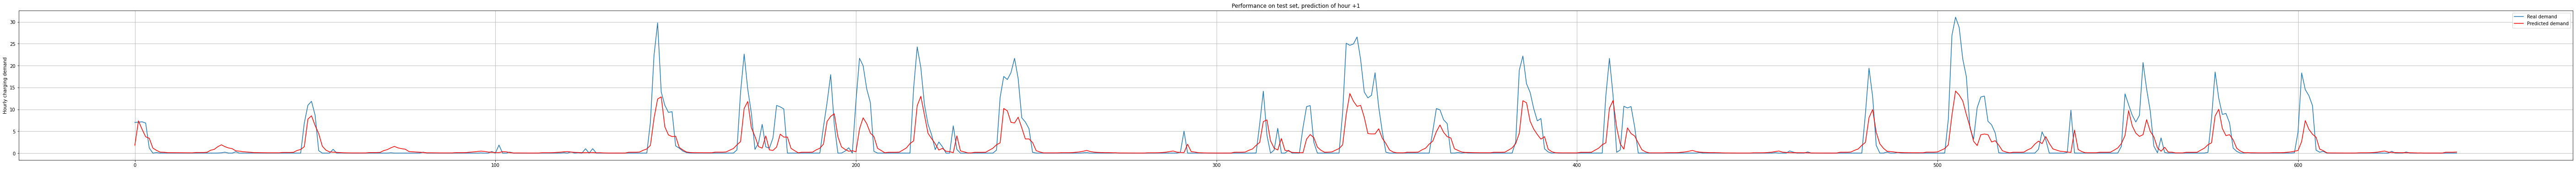

In [106]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Performance on test set, prediction of hour +1')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

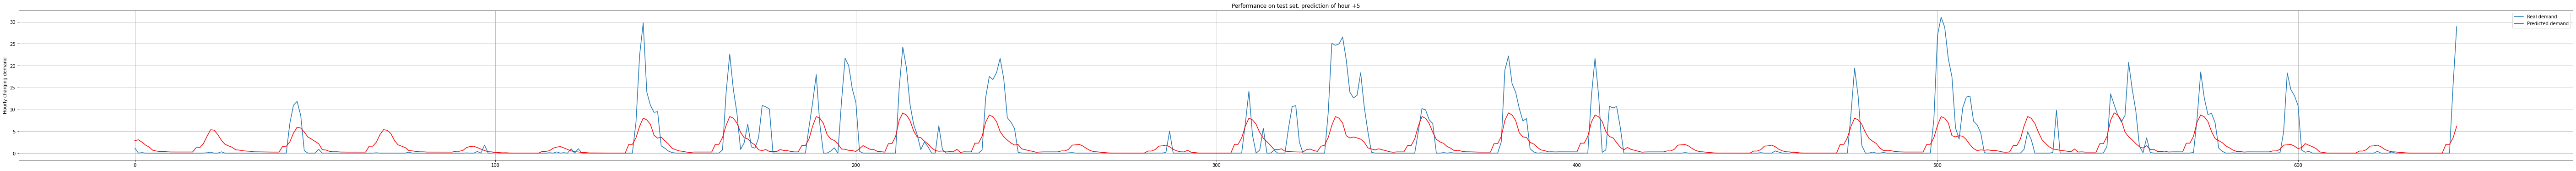

In [107]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,4])
plt.plot(range(len(preds)), preds[:,4], 'r')
plt.title('Performance on test set, prediction of hour +5')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()